# SLR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('C:\\Users\\admin\\ML\\SLR-master\\Salary_Data.csv')

In [3]:
data1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data1.shape

(30, 2)

In [5]:
# retrieve only 0th column
x = data1.iloc[:, :-1].values

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
# retrieve 1st column
y = data1.iloc[:, 1].values

In [8]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [9]:
# take 70% of data for training and 30% for testing
# random_state indicates the random seed used in splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
# train the computer
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
reg =  LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# make prediction based on testing data
y_pred = reg.predict(x_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [12]:
# find the r squared value by comparing test data and predicted data
# If it is nearer to 1, test values and predicted values are very close.
r2_score(y_test,y_pred)

0.9740993407213511

In [13]:
# predict the salary of employee with experience 11 Years
print(reg.predict([[11]]))

[129740.26548933]


In [14]:
# predict the salary of employee with experience 19 Years
print(reg.predict([[19]]))

[204622.35577888]


In [15]:
# predict the salary of employee with experience 1 Years
print(reg.predict([[1]]))

[36137.65262739]


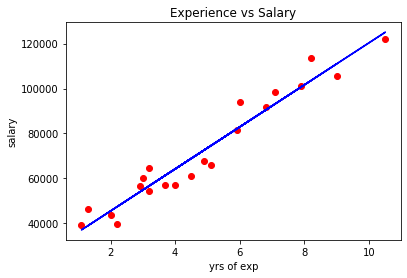

In [16]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title("Experience vs Salary")
plt.xlabel("yrs of exp")
plt.ylabel("salary")
plt.show()

# MLR

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [18]:
# load the data into dataframe
data2 = pd.read_csv('C:\\Users\\admin\\ML\\MLR-master\\Cars1.csv')

In [19]:
data2.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [20]:
data2.shape

(81, 5)

In [21]:
data2.fillna(0)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [22]:
data2.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [23]:
import statsmodels.formula.api as smf

In [24]:
ml1 = smf.ols("MPG ~ HP + VOL + SP + WT",data=data2).fit()

In [25]:
ml1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [26]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.54e-23
Time:                        13:58:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
ml1_v = smf.ols("MPG ~ VOL",data=data2).fit()

In [28]:
ml1_w = smf.ols("MPG ~ WT",data=data2).fit()

In [29]:
ml1_vw= smf.ols("MPG ~ WT+VOL", data = data2).fit()

In [30]:
ml1_vw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.43e-06
Time:                        13:58:35   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# After combining Vol and Wt, the p values are not significant.
# So u need to find the influential records and delete those records

In [32]:
# Checking for  influential records through index plot

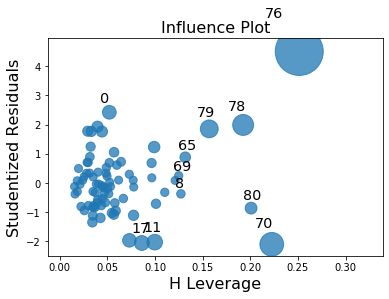

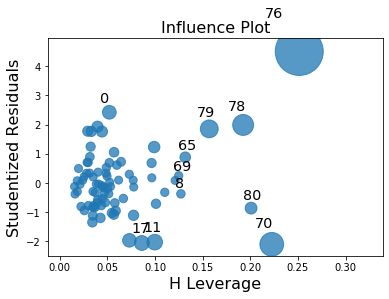

In [33]:
#stats models.api is used for influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [34]:
# to remove the influential records we need to use the 
# drop function along with the index of the variable which we want to remove

In [35]:
data_new=data2.drop(data2.index[[66,68]],axis = 0,inplace = False)

In [36]:
data_new.tail(20)

,HP,MPG,VOL,SP,WT
59,100,28.860225,115,115.576579,37.662874
60,145,27.354265,111,130.208698,36.888153
61,120,24.609132,116,117.668550,37.860411
62,140,23.515917,131,126.048103,43.390988
63,140,23.515917,123,125.312342,40.722831
64,150,23.605158,121,128.128401,40.159482
65,165,40.050000,50,126.598513,15.712859
67,165,23.103172,127,133.680223,41.573975
69,245,21.273708,112,158.300669,37.141733
70,280,19.678507,50,164.598513,15.823060


In [37]:
ml1_new = smf.ols("MPG ~ HP+VOL+SP+WT",data=data_new).fit()

In [38]:
ml1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     59.53
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.17e-22
Time:                        13:58:43   Log-Likelihood:                -228.88
No. Observations:                  79   AIC:                             467.8
Df Residuals:                      74   BIC:                             479.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1267     15.068      2.066      0.042       1.103      61.150
HP            -0.2032      0.040     -5.119      0.000      -0.282      -0.124
VOL           -0.4012      0.583     -0.688      0.494      -1.564       0.761
SP             0.3898      0.160      2.436      0.017       0.071       0.709
WT             0.6006      1.738      0.346      0.731      -2.863       4.064
==============================================================================
Omnibus:                        9.670   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.953
Skew:                           0.682   Prob(JB):                      0.00690
Kurtosis:                       4.080   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
print(ml1_new.conf_int(0.05))

                  0          1
Intercept  1.103433  61.149975
HP        -0.282352  -0.124122
VOL       -1.563680   0.761319
SP         0.071030   0.708646
WT        -2.862865   4.064159


In [40]:
mpg_pred = ml1_new.predict(data_new)

In [41]:
data_new['pv'] = data_new['pv'] = mpg_pred

In [42]:
data_new['pv']

0     43.354256
1     42.452655
2     42.288536
3     42.622074
4     42.122307
5     43.093176
6     42.357540
7     47.982674
8     48.290040
9     40.811732
10    41.566583
11    47.676529
12    40.022564
13    41.575650
14    41.810083
15    41.711450
16    41.092833
17    47.941166
18    41.329253
19    37.830861
20    38.559367
21    37.338287
22    37.819772
23    39.648938
24    39.864721
25    46.680986
26    35.430092
27    38.865949
28    38.361995
29    36.117726
        ...    
49    33.445439
50    33.298571
51    33.432369
52    29.211217
53    27.707222
54    28.433247
55    28.616351
56    35.877330
57    33.010599
58    35.394349
59    32.345428
60    30.043291
61    28.813678
62    25.319812
63    26.639810
64    26.169230
65    36.324307
67    23.727507
69    20.422002
70    27.832046
71    22.489839
72    23.189384
73    18.936241
74    24.027240
75    21.297965
76    21.431397
77    18.099310
78    26.187090
79    12.581678
80    15.743397
Name: pv, Length: 79, dt

In [43]:
data_new.head()

,HP,MPG,VOL,SP,WT,pv
0,49,53.700681,89,104.185353,28.762059,43.354256
1,55,50.013401,92,105.461264,30.466833,42.452655
2,55,50.013401,92,105.461264,30.193597,42.288536
3,70,45.696322,92,113.461264,30.632114,42.622074
4,53,50.504232,92,104.461264,29.889149,42.122307


In [44]:
data2['P'] = data2['p'] = mpg_pred

In [45]:
data2.head()

,HP,MPG,VOL,SP,WT,P,p
0,49,53.700681,89,104.185353,28.762059,43.354256,43.354256
1,55,50.013401,92,105.461264,30.466833,42.452655,42.452655
2,55,50.013401,92,105.461264,30.193597,42.288536,42.288536
3,70,45.696322,92,113.461264,30.632114,42.622074,42.622074
4,53,50.504232,92,104.461264,29.889149,42.122307,42.122307


In [46]:
rsq_hp = smf.ols("HP ~ WT+VOL+SP", data = data2).fit()
rsq_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     485.8
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           6.46e-50
Time:                        13:58:44   Log-Likelihood:                -320.90
No. Observations:                  81   AIC:                             649.8
Df Residuals:                      77   BIC:                             659.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -359.1891     14.118    -25.443      0.000    -387.301    -331.077
WT            -5.8704      4.875     -1.204      0.232     -15.579       3.838
VOL            1.9137      1.638      1.168      0.246      -1.348       5.175
SP             3.9323      0.103     38.045      0.000       3.726       4.138
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.483
Skew:                           0.564   Prob(JB):                       0.0391
Kurtosis:                       3.805   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
data3 =pd.read_csv('C:\\Users\\admin\\ML\\ML $ AI\\5-multiple-linear-reg\\5-multiple-linear-reg\\homeprices.csv')

In [48]:
data3.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [49]:
data3.fillna(0)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,0.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [50]:
data3.shape

(5, 4)

In [51]:
data3.corr()

,area,bedrooms,age,price
area,1.000000,0.615882,-0.224033,0.863330
bedrooms,0.615882,1.000000,-0.893803,0.836008
age,-0.224033,-0.893803,1.000000,-0.621277
price,0.863330,0.836008,-0.621277,1.000000


C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


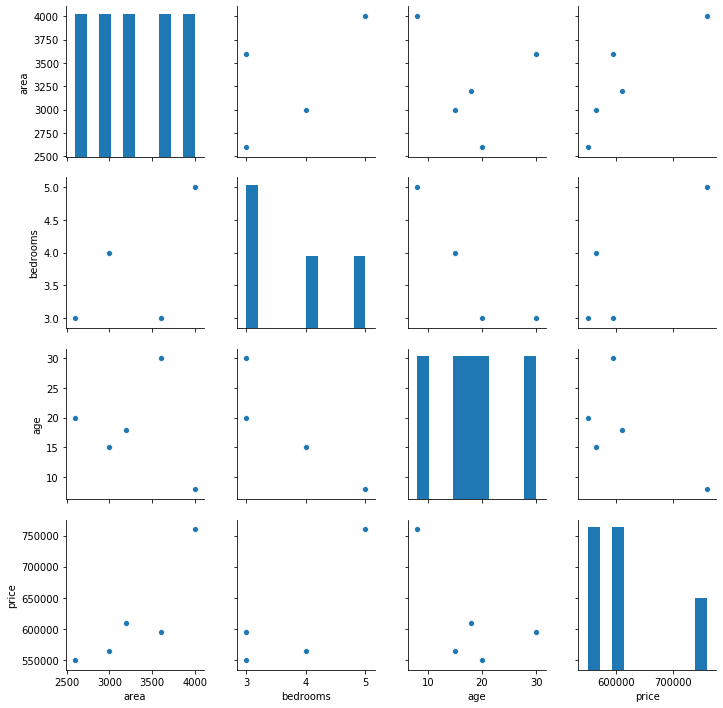

In [52]:
sns.pairplot(data3.iloc[:,:])

# Logistics Regression

In [53]:
data4  = pd.read_csv('C:\\Users\\admin\\ML\\Logistic-Regression-master\\Auto.csv')

In [54]:
data4.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [55]:
data4.shape

(406, 9)

In [56]:
data4.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [57]:
data4.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model_year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000


In [58]:
from sklearn.preprocessing import LabelEncoder
data4['car_name_encoder'] = LabelEncoder().fit_transform(data4.car_name)
data4

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_name_encoder
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,50
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,37
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,235
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,164
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,143
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,55
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,227
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,246
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,1


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
oh = OneHotEncoder()
oh1 = oh.fit_transform(data4.car_name.values.reshape(-1,1)).toarray()
oh2 = pd.DataFrame(oh1,columns = ["car_name_"+str(oh.categories_[0][i]) 
                                       for i in range(len(oh.categories_[0]))])
oh3 = pd.concat([data4,oh2],axis=1)
oh3                     

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_name_encoder,...,car_name_volvo 145e (sw),car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
oh3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name_encoder,car_name_amc ambassador brougham,...,car_name_volvo 145e (sw),car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,37,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,235,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
oh3.isnull().sum()

mpg                                         8
cylinders                                   0
displacement                                0
horsepower                                  6
weight                                      0
acceleration                                0
model_year                                  0
origin                                      0
car_name_encoder                            0
car_name_amc ambassador brougham            0
car_name_amc ambassador dpl                 0
car_name_amc ambassador sst                 0
car_name_amc concord                        0
car_name_amc concord d/l                    0
car_name_amc concord dl                     0
car_name_amc concord dl 6                   0
car_name_amc gremlin                        0
car_name_amc hornet                         0
car_name_amc hornet sportabout (sw)         0
car_name_amc matador                        0
car_name_amc matador (sw)                   0
car_name_amc pacer                

In [82]:
oh3.fillna(0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name_encoder,car_name_amc ambassador brougham,...,car_name_volvo 145e (sw),car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,37,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,235,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15.0,8,429.0,198.0,4341,10.0,70,1,143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14.0,8,454.0,220.0,4354,9.0,70,1,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,14.0,8,440.0,215.0,4312,8.5,70,1,227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,14.0,8,455.0,225.0,4425,10.0,70,1,246,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,15.0,8,390.0,190.0,3850,8.5,70,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X = oh3.iloc[:,1:]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name_encoder,car_name_amc ambassador brougham,car_name_amc ambassador dpl,...,car_name_volvo 145e (sw),car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom
0,8,307.0,130.0,3504,12.0,70,1,50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,350.0,165.0,3693,11.5,70,1,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,318.0,150.0,3436,11.0,70,1,235,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,304.0,150.0,3433,12.0,70,1,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,302.0,140.0,3449,10.5,70,1,164,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y = oh3.iloc[:,:1]
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 320)
(122, 320)
(284, 1)
(122, 1)


In [87]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Naive Bayes

# Clustering